In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
# Load sites and read counts
fp_atac = 'annot/S1_accessible_sites/S1a_accessible_sites.tsv'
df_atac = pd.read_csv(fp_atac, sep='\t').query('(atac_source == "atac_wt_pe") | (atac_source == "atac_wt_se")')
df_atac.head()

,chrom,start,end,atac_mode,atac_source,atac_wt_emb_height,atac_wt_l1_height,atac_wt_l2_height,atac_wt_l3_height,atac_wt_l4_height,...,atac_glp1_d7_rep1_count,atac_glp1_d7_rep2_count,atac_glp1_d10_rep1_count,atac_glp1_d10_rep2_count,atac_glp1_d14_rep1_count,atac_glp1_d14_rep2_count,atac_gon2gem1_ya_rep1_count,atac_gon2gem1_ya_rep2_count,atac_gon2gem1_d3_rep1_count,atac_gon2gem1_d3_rep2_count
0,chrI,1870,2092,1981,atac_wt_se,1.621415,1.459215,1.354735,1.672520,1.204265,...,40,39,44,52,39,73,36,40,49,81
1,chrI,3809,3994,3901,atac_wt_pe,61.688004,55.224873,69.346062,123.587425,165.852905,...,2416,2988,2265,3612,1899,1959,3781,6896,4179,4272
2,chrI,4302,4410,4356,atac_wt_se,1.458345,2.518715,2.017625,3.193275,5.416205,...,48,31,58,58,33,51,58,94,49,99
3,chrI,11245,11465,11355,atac_wt_pe,2.679690,4.330160,9.348130,10.026175,10.876090,...,802,928,682,1043,504,922,542,738,600,661
4,chrI,13087,13207,13147,atac_wt_pe,5.160855,3.462505,3.761785,3.173980,2.518795,...,62,71,72,133,77,116,89,111,71,112


In [3]:
# Load differential accessibility
fp_diff = 'annot/S1_accessible_sites/S1b_differential_accessibility_wt.tsv'
df_diff = pd.read_csv(fp_diff, sep='\t')
assert len(df_atac) == len(df_diff)
df_diff.head()

,chrom,start,end,atac_wt_emb_to_wt_l1_log2FoldChange,atac_wt_emb_to_wt_l1_padj,atac_wt_emb_to_wt_l2_log2FoldChange,atac_wt_emb_to_wt_l2_padj,atac_wt_emb_to_wt_l3_log2FoldChange,atac_wt_emb_to_wt_l3_padj,atac_wt_emb_to_wt_l4_log2FoldChange,...,atac_wt_l1_to_wt_l2_decr,atac_wt_l1_to_wt_l3_decr,atac_wt_l1_to_wt_l4_decr,atac_wt_l1_to_wt_ya_decr,atac_wt_l2_to_wt_l3_decr,atac_wt_l2_to_wt_l4_decr,atac_wt_l2_to_wt_ya_decr,atac_wt_l3_to_wt_l4_decr,atac_wt_l3_to_wt_ya_decr,atac_wt_l4_to_wt_ya_decr
0,chrI,1870,2092,-0.092082,0.848886,-0.348957,4.498232e-01,-0.333484,5.490777e-01,-0.630447,...,False,False,False,False,False,False,False,False,False,False
1,chrI,3809,3994,-0.321362,0.145723,0.112691,6.428399e-01,0.722494,1.828665e-03,1.102857,...,False,False,False,False,False,False,False,False,False,False
2,chrI,4302,4410,0.528455,0.202293,0.375660,4.112677e-01,0.556978,2.413481e-01,1.385909,...,False,False,False,False,False,False,False,False,False,False
3,chrI,11245,11465,0.746553,0.004700,1.755124,4.660022e-14,1.790636,1.527621e-11,1.710667,...,False,False,False,False,False,False,False,False,False,False
4,chrI,13087,13207,-0.664174,0.025048,-0.462738,1.235036e-01,-1.027094,2.232079e-03,-1.351782,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Define constitutive/dynamic
df_pats = pd.DataFrame()
df_pats[['chrom', 'start', 'end']] = df_atac[['chrom', 'start', 'end']]
l_incr = ['atac_%s_to_%s_incr' % (s1, s2) for (s1, s2) in itertools.combinations(config['stages_wt'], 2)]
l_decr = ['atac_%s_to_%s_decr' % (s1, s2) for (s1, s2) in itertools.combinations(config['stages_wt'], 2)]
m_any = df_diff[l_incr + l_decr].any(axis=1)
df_pats['atac_is_dynamic'] = list(map(lambda f: 'dynamic' if f else 'constitutive', m_any))
df_pats['atac_is_dynamic'].value_counts()

dynamic         26761
constitutive     8967
Name: atac_is_dynamic, dtype: int64

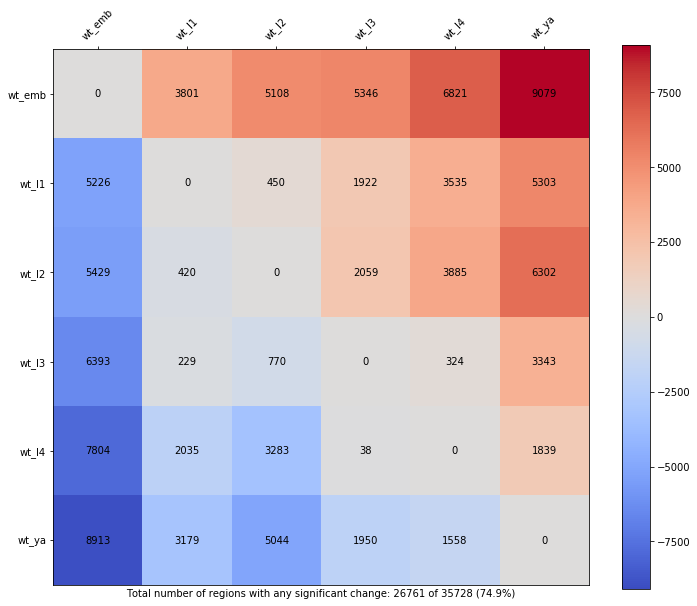

In [5]:
diff_counts = np.zeros([len(config['stages_wt']), len(config['stages_wt'])])
for ((stage1_i, stage1), (stage2_i, stage2)) in itertools.combinations(enumerate(config['stages_wt']), 2):
    col_incr = 'atac_%s_to_%s_incr' % (stage1, stage2)
    col_decr = 'atac_%s_to_%s_decr' % (stage1, stage2)
    diff_counts[stage1_i, stage2_i] = len(df_diff.query(col_incr))
    diff_counts[stage2_i, stage1_i] = -len(df_diff.query(col_decr))
    
plt.figure(figsize=(12,10))
ax = plt.gca()
clim = max(-diff_counts.min(), diff_counts.max())
plt.imshow(diff_counts, interpolation='none', cmap = 'coolwarm', vmin=-clim, vmax=+clim)
ax.xaxis.tick_top()
ax.set_xticks(range(len(config['stages_wt'])))
ax.set_yticks(range(len(config['stages_wt'])))
ax.set_xticklabels(config['stages_wt'], rotation=45)
ax.set_yticklabels(config['stages_wt'])
plt.colorbar()
for (y, x), c in np.ndenumerate(diff_counts):
    ax.text(x, y, '%d' % (abs(c),), color='k', horizontalalignment='center', verticalalignment='center')

n_dynamic = len(df_pats.query('atac_is_dynamic == "dynamic"'))
n_all = len(df_pats)
ax.set_xlabel('Total number of regions with any significant change: %d of %d (%.1f%%)' \
              % (n_dynamic, n_all, 100 * n_dynamic / n_all))
plt.savefig('annot/S1_accessible_sites/differential_accessibility_counts.png' % locals(), bbox_inches='tight')

In [6]:
fp_pats = 'annot/S1_accessible_sites/S1c_accessibility_patterns_wt.tsv'
df_pats.to_csv(fp_pats, sep='\t', index=False)
!wc -l {fp_pats}

35729 annot/S1_accessible_sites/S1c_accessibility_patterns_wt.tsv


In [7]:
# Visualise constitutive/dynamic calls
d_legend = {
    'constitutive': yp.ORANGE,
    'dynamic': yp.BLACK,
}
fp_ = 'annot/S1_accessible_sites/S1c_accessibility_patterns_wt.bed'
write_gffbed(fp_,
    chrom = df_atac['chrom'],
    start = df_atac['start'],
    end = df_atac['end'],
    name = df_pats['atac_is_dynamic'].tolist(),
    itemRgb = list(map(lambda atac_is_dynamic: d_legend[atac_is_dynamic], df_pats['atac_is_dynamic'])),
)